# Young Adult Migration Pattern Dataset <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Members

|    Name           |           Matric Number       |   Task  |                   
|-------------------|-------------------------------|----------------|
|Muhammad Adam Fahmi Bin Mohd Taufiq    | A21EC0061 | Vaex |
|Mikhail Bin Yassin |A21EC0053 | Compare All Overview |
|Muhammad Farhan Bin Ibrahim|   A21EC0072 | Dask |
|Muhammad Fikri Bin Sharunazim |A21EC0075| Modin |

---
#About Dataset
**Young Adult Migration Pattern Dataset**

How far do people migrate between childhood and young adulthood? Where do they go? How much does one's location during childhood determine the labor markets that one is exposed to in young adulthood?

This project sheds light on these questions using newly constructed and publicly available statistics on the migration patterns of young adults in the United States. Use this resource to discover where people in your hometown moved as young adults.

Researchers at Harvard University and the Census Bureau have linked federal tax filings, Census records, and other government data to track the migration patterns of young US residents. Specifically, for each person born in the US between 1984 and 1992, the researchers compared where they lived at age 16 to where they lived at age 26. The project’s public dataset counts the approximate number who moved to/from each pair of commuting zones — overall and disaggregated by race/ethnicity and parental income level.

-------------------------------------------------------------------------

##Migration Patterns Data Dictionary

###Data Files:

• od_pooled.csv – Dataset contains count and fractions of people who move between each
origin and destination (OD) commuting zone pair. These data are unique at the OD level. The variable pool takes the value “pooled”.

• od_race.csv – Dataset contains count and fractions of people who move between each OD commuting zone pair separately by race/ethnicity. These data are unique at the OD x race level. The variable pool takes the values “Asian”, “Black”, “Hispanic”, “White”, and “Other”. Note that “Other” includes not only other races but also people who are not linked to the Decennial Census or ACS.

• od_inc.csv – Dataset contains count and fractions of people who move between each origin and destination commuting zone pair separately by parental income quintile. These data are unique at the OD x income quintile level. The variable pool takes the values “Q1” (poorest parental income quintile), …, “Q5” (richest parental income quintile).

• od.csv – Dataset contains count and fractions of people who move between each origin and destination commuting zone pair separately by race/ethnicity and parental income quintile. These data are unique at the OD x race/ethnicity x parental income level. The variable pool takes the values of the pairwise combinations of race (“Asian”, “Black”,
“Hispanic”, “White”, and “Other”) and parental income quintile (“Q1” - “Q5”). Note that the “Other” race/ethnicity category includes not only other races but also people who are not linked to the Decennial Census or ACS.



###Geographic variables:

• `o_cz`: The numeric identifier of the commuting zone (CZ) in which the individual resided in childhood/at age 16 (referred to as origin CZ hereafter).

• `o_cz_name`: The name of the origin CZ.

• `o_state_name`: The name of the state the origin CZ is in.

• `d_cz`: The numeric identifier of the CZ in which the individual resides in young adulthood/at age 26 (referred to as destination CZ hereafter).

• `d_cz_name`: The name of the destination CZ.

• `d_state_name`: The name of the state the destination CZ is in.


###Migration variables:

• `n`: The number of individuals from origin o living in destination d.

• `n_tot_o`: Total number of individuals from origin o. Generated by summing n across d_cz cells for each o_cz.

• `n_tot_d`: Total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz.

• `pr_d_o`: Pr{D|O}. The probability an individual lives in destination d given they grew up in origin o. Generated as n/n_tot_o.

• `pr_o_d`: Pr{O|D}. The probability an individual is from origin o given they live in destination d. Generated as n/n_tot_d.




We start by importing all the necessary packages and modules

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [ ]:
pip install vaex

In [ ]:
pip install --upgrade vaex

In [ ]:
! pip install kaggle

In [ ]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adamfahmiadamochie","key":"751d5dc469fe52ec46996241aed1e097"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download sujaykapadnis/young-adult-migration-patterns

 95% 258M/273M [00:04<00:00, 23.3MB/s]
100% 273M/273M [00:04<00:00, 64.1MB/s]


In [ ]:
! unzip young-adult-migration-patterns.zip

Archive:  young-adult-migration-patterns.zip
  inflating: Data Dictionary.pdf     
  inflating: od.csv                  
  inflating: od_inc.csv              
  inflating: od_pooled.csv           
  inflating: od_race.csv             


In [ ]:
import vaex

%time df = vaex.from_csv('od.csv', convert=True)

CPU times: user 40.9 s, sys: 12.9 s, total: 53.8 s
Wall time: 58.3 s


In [ ]:
%time df

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


#,o_cz,o_cz_name,o_state_name,d_cz,d_cz_name,d_state_name,n,n_tot_o,n_tot_d,pool,pr_d_o,pr_o_d
0,100,Johnson City,Tennessee,10000,Panama City,Florida,0,36,44,AsianQ1,0.0,0.0
1,100,Johnson City,Tennessee,31303,Kerrville,Texas,0,36,2,AsianQ1,0.0,0.0
2,100,Johnson City,Tennessee,10600,Jasper,Alabama,0,36,6,AsianQ1,0.0,0.0
3,100,Johnson City,Tennessee,2600,Roanoke Rapids,North Carolina,0,36,8,AsianQ1,0.0,0.0
4,100,Johnson City,Tennessee,11402,Marinette,Michigan,0,36,5,AsianQ1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"13,727,020",39400,Seattle,Washington,22800,Eau Claire,Wisconsin,1,96029,4638,WhiteQ5,1.04e-05,0.0002156
"13,727,021",39400,Seattle,Washington,16500,Erie,Pennsylvania,7,96029,5811,WhiteQ5,7.29e-05,0.0012046
"13,727,022",39400,Seattle,Washington,33601,Lawton,Oklahoma,11,96029,1806,WhiteQ5,0.0001145,0.0060908
"13,727,023",39400,Seattle,Washington,38601,Spokane,Washington,924,96029,11179,WhiteQ5,0.0096221,0.082655


## Big Data Operations

In this section, we will:

- Drop for any Nan value in every columns and remove the row from the dataframe.
- Optimize the data types.

In [ ]:
# Check for missing values and drop
%time df.dropna

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


<bound method DataFrame.dropna of #           o_cz    o_cz_name     o_state_name    d_cz    d_cz_name       d_state_name    n    n_tot_o    n_tot_d    pool     pr_d_o     pr_o_d
0           100     Johnson City  Tennessee       10000   Panama City     Florida         0    36         44         AsianQ1  0.0        0.0
1           100     Johnson City  Tennessee       31303   Kerrville       Texas           0    36         2          AsianQ1  0.0        0.0
2           100     Johnson City  Tennessee       10600   Jasper          Alabama         0    36         6          AsianQ1  0.0        0.0
3           100     Johnson City  Tennessee       2600    Roanoke Rapids  North Carolina  0    36         8          AsianQ1  0.0        0.0
4           100     Johnson City  Tennessee       11402   Marinette       Michigan        0    36         5          AsianQ1  0.0        0.0
...         ...     ...           ...             ...     ...             ...             ...  ...        ...        

In [ ]:
 # drop 'pr_d_o' and 'pr_o_d' columns

start_time_info = time.time()
df.drop('pr_d_o', inplace=True)
df.drop('pr_o_d', inplace=True)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.00 seconds


In [ ]:
start_time_info = time.time()
df.info()
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

column,type,unit,description,expression
o_cz,int64,,,
o_cz_name,str,,,
o_state_name,str,,,
d_cz,int64,,,
d_cz_name,str,,,
d_state_name,str,,,
n,int64,,,
n_tot_o,int64,,,
n_tot_d,int64,,,
pool,str,,,



Time taken to run the info operation: 0.02 seconds


In [ ]:
# change 'o_cz_name' from object to categorical

start_time_info = time.time()
%time df['o_cz_name'] = df['o_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 2.05 ms, sys: 14 µs, total: 2.06 ms
Wall time: 2.08 ms

Time taken to run the info operation: 0.00 seconds


In [ ]:
# ch# change 'o_state_name' from object to categorical

start_time_info = time.time()
%time df['o_state_name'] = df['o_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 1.98 ms

Time taken to run the info operation: 0.01 seconds


In [ ]:
# change 'd_cz_name' from object to categorical

start_time_info = time.time()
%time df['d_cz_name'] = df['d_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 2.14 ms, sys: 0 ns, total: 2.14 ms
Wall time: 2.13 ms

Time taken to run the info operation: 0.00 seconds


In [ ]:
# change 'd_state_name' from object to categorical

start_time_info = time.time()
%time df['d_state_name'] = df['d_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 2.64 ms, sys: 0 ns, total: 2.64 ms
Wall time: 2.53 ms

Time taken to run the info operation: 0.00 seconds


In [ ]:
# change 'pool' from object to categorical

start_time_info = time.time()
%time df['pool'] = df['pool'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 1.49 ms, sys: 0 ns, total: 1.49 ms
Wall time: 1.49 ms

Time taken to run the info operation: 0.00 seconds


In [ ]:
start_time_info = time.time()

# check 'o_cz' highest value
%time highest_value = df['o_cz'].max()

# check 'o_cz' lowest value
%time lowest_value = df['o_cz'].min()

print()
print(f"The highest value in the o_cz is: {highest_value}")
print(f"The lowest value in the o_cz is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 114 ms, sys: 12.4 ms, total: 127 ms
Wall time: 84.2 ms
CPU times: user 32.3 ms, sys: 1.07 ms, total: 33.4 ms
Wall time: 19.4 ms

The highest value in the o_cz is: 39400
The lowest value in the o_cz is: 100

Time taken to run the info operation: 0.11 seconds


In [ ]:
# change the datatype 'o_cz' from int64 to int32

start_time_info = time.time()
%time df['o_cz'] = df['o_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 2.79 ms, sys: 212 µs, total: 3.01 ms
Wall time: 6.14 ms

Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()

# check 'd_cz' highest value
%time highest_value = df['d_cz'].max()

# check 'd_cz' lowest value
%time lowest_value = df['d_cz'].min()

print()
print(f"The highest value in the d_cz is: {highest_value}")
print(f"The lowest value in the d_cz is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 110 ms, sys: 4.34 ms, total: 115 ms
Wall time: 64.7 ms
CPU times: user 34.1 ms, sys: 2.71 ms, total: 36.8 ms
Wall time: 22.1 ms

The highest value in the d_cz is: 39400
The lowest value in the d_cz is: 100

Time taken to run the info operation: 0.09 seconds


In [ ]:
# change the datatype 'd_cz' from int64 to int32

start_time_info = time.time()
%time df['d_cz'] = df['d_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.64 ms

Time taken to run the info operation: 0.00 seconds


In [ ]:
start_time_info = time.time()

# check 'n' highest value
%time highest_value = df['n'].max()

# check 'n' lowest value
%time lowest_value = df['n'].min()

print()
print(f"The highest value in the n is: {highest_value}")
print(f"The lowest value in the n is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 131 ms, sys: 12.2 ms, total: 143 ms
Wall time: 84.1 ms
CPU times: user 34.8 ms, sys: 2.92 ms, total: 37.8 ms
Wall time: 28.7 ms

The highest value in the n is: 189469
The lowest value in the n is: -2

Time taken to run the info operation: 0.11 seconds


In [ ]:
# change the datatype 'n' from int64 to int32

start_time_info = time.time()
%time df['n'] = df['n'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 1.96 ms

Time taken to run the info operation: 0.00 seconds


In [ ]:
start_time_info = time.time()

# check 'n_tot_o' highest value
%time highest_value = df['n_tot_o'].max()

# check 'n_tot_o' lowest value
%time lowest_value = df['n_tot_o'].min()

print()
print(f"The highest value in the n_tot_o is: {highest_value}")
print(f"The lowest value in the n_tot_o is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 76.9 ms, sys: 6.95 ms, total: 83.8 ms
Wall time: 50.9 ms
CPU times: user 33.3 ms, sys: 67 µs, total: 33.4 ms
Wall time: 19.1 ms

The highest value in the n_tot_o is: 220922
The lowest value in the n_tot_o is: -4

Time taken to run the info operation: 0.07 seconds


In [ ]:
# change the datatype 'n_tot_o' from int64 to int32

start_time_info = time.time()
%time df['n_tot_o'] = df['n_tot_o'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 6.57 ms, sys: 0 ns, total: 6.57 ms
Wall time: 16.8 ms

Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()

# check 'n_tot_d' highest value
%time highest_value = df['n_tot_d'].max()

# check 'n_tot_d' lowest value
%time lowest_value = df['n_tot_d'].min()

print()
print(f"The highest value in the n_tot_d is: {highest_value}")
print(f"The lowest value in the n_tot_d is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 83.6 ms, sys: 6.92 ms, total: 90.6 ms
Wall time: 104 ms
CPU times: user 36.9 ms, sys: 954 µs, total: 37.9 ms
Wall time: 37.9 ms

The highest value in the n_tot_d is: 289532
The lowest value in the n_tot_d is: -3

Time taken to run the info operation: 0.14 seconds


In [ ]:
# change the datatype 'n_tot_d' from int64 to int32

start_time_info = time.time()
%time df['n_tot_d'] = df['n_tot_d'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

CPU times: user 2.61 ms, sys: 157 µs, total: 2.76 ms
Wall time: 5.52 ms

Time taken to run the info operation: 0.01 seconds


In [ ]:
%time df.info()

[12/24/23 09:10:56] ERROR    error evaluating: o_cz_name at rows 0-5                              ]8;id=784788;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=254808;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: o_cz_name at rows 0-5
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", l

                    ERROR    error evaluating: o_state_name at rows 0-5                           ]8;id=172737;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=514961;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: o_state_name at rows 0-5
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py"

                    ERROR    error evaluating: d_cz_name at rows 0-5                              ]8;id=594871;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=580870;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: d_cz_name at rows 0-5
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", l

[12/24/23 09:10:57] ERROR    error evaluating: d_state_name at rows 0-5                           ]8;id=570534;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=577696;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: d_state_name at rows 0-5
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py"

                    ERROR    error evaluating: pool at rows 0-5                                   ]8;id=764009;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=639481;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: pool at rows 0-5
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 3

[12/24/23 09:10:58] ERROR    error evaluating: o_cz_name at rows 13727020-13727025                ]8;id=809728;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=463983;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: o_cz_name at rows 13727020-13727025
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/da

                    ERROR    error evaluating: o_state_name at rows 13727020-13727025             ]8;id=834287;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=982524;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: o_state_name at rows 13727020-13727025
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex

                    ERROR    error evaluating: d_cz_name at rows 13727020-13727025                ]8;id=829363;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=378317;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: d_cz_name at rows 13727020-13727025
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/da

[12/24/23 09:10:59] ERROR    error evaluating: d_state_name at rows 13727020-13727025             ]8;id=433824;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=708550;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                    

ERROR:vaex:error evaluating: d_state_name at rows 13727020-13727025
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex

                    ERROR    error evaluating: pool at rows 13727020-13727025                     ]8;id=411133;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py\dataframe.py]8;;\:]8;id=62367;file:///usr/local/lib/python3.10/dist-packages/vaex/dataframe.py#4101\4101]8;;\
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 113, in evaluate                                                                 
                                 result = self[expression]                                                         
                               File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py",                      
                             line 198, in __getitem__                                                              
                                 raise KeyError("Unknown variables or column: %r" % (variable,))                   
                             KeyError: 'Unknown variables or column: "astype(__d_state_name,                       
                             \'category\')"'                                                                       
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias                  
                             KeyError: 'category'                                                                  
                                                                                                                   
                             During handling of the above exception, another exception occurred:                   
                                                                                                                   
                             Traceback (most recent call last):                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 2273, in data_type                                                               
                                 data = self.evaluate(expression, 0, 1, filtered=False,                            
                             array_type=array_type, parallel=False)                                                
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 3095, in evaluate                                                                
                                 return self._evaluate_implementation(expression, i1=i1, i2=i2,                    
                             out=out, selection=selection, filtered=filtered,                                      
                             array_type=array_type, parallel=parallel, chunk_size=chunk_size,                      
                             progress=progress)                                                                    
                               File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py",                   
                             line 6562, in _evaluate_implementation                                                
                                 value = block_scope.evaluate(expression)                                     

ERROR:vaex:error evaluating: pool at rows 13727020-13727025
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 113, in evaluate
    result = self[expression]
  File "/usr/local/lib/python3.10/dist-packages/vaex/scopes.py", line 198, in __getitem__
    raise KeyError("Unknown variables or column: %r" % (variable,))
KeyError: 'Unknown variables or column: "astype(__d_state_name, \'category\')"'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pyarrow/types.pxi", line 3231, in pyarrow.lib.type_for_alias
KeyError: 'category'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/vaex/dataframe.py", line 2273, in data_type
    data = self.evaluate(expression, 0, 1, filtered=False, array_type=array_type, parallel=False)
  File "/usr/local/lib/python3.10/dist-packages/vaex/datafra

column,type,unit,description,expression
o_cz,virtual column,,,"astype(__o_cz, 'int32')"
o_cz_name,virtual column,,,"astype(__o_cz_name, 'category')"
o_state_name,virtual column,,,"astype(__o_state_name, 'category')"
d_cz,virtual column,,,"astype(__d_cz, 'int32')"
d_cz_name,virtual column,,,"astype(__d_cz_name, 'category')"
d_state_name,virtual column,,,"astype(__d_state_name, 'category')"
n,virtual column,,,"astype(__n, 'int32')"
n_tot_o,virtual column,,,"astype(__n_tot_o, 'int32')"
n_tot_d,virtual column,,,"astype(__n_tot_d, 'int32')"
pool,virtual column,,,"astype(__pool, 'category')"


CPU times: user 4.21 s, sys: 266 ms, total: 4.47 s
Wall time: 4.64 s


## Exploratory Data Analysis (EDA)

In this section, we will:

- Provide some useful visualizations to make better understanding on the analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df['n'].sum()

array(31434476)

In [ ]:
import vaex
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '/content/od.csv'

# Read the CSV file into a Vaex DataFrame
df_vaex = vaex.from_csv(csv_file_path)

# Select numerical columns
num_cols = ['o_cz', 'd_cz', 'n', 'n_tot_o', 'n_tot_d']

try:
    # Plot histograms using Vaex's new histogram method
    df_vaex[num_cols].viz.histogram(figsize=(15, 10), title='Distribution of Numerical Features');
    plt.show()

except IndexError as e:
    print(f"An error occurred: {e}")
    # Handle the error or log it as needed

An error occurred: list index out of range


<Figure size 1200x800 with 0 Axes>


Time taken to run the code: 82.90 seconds


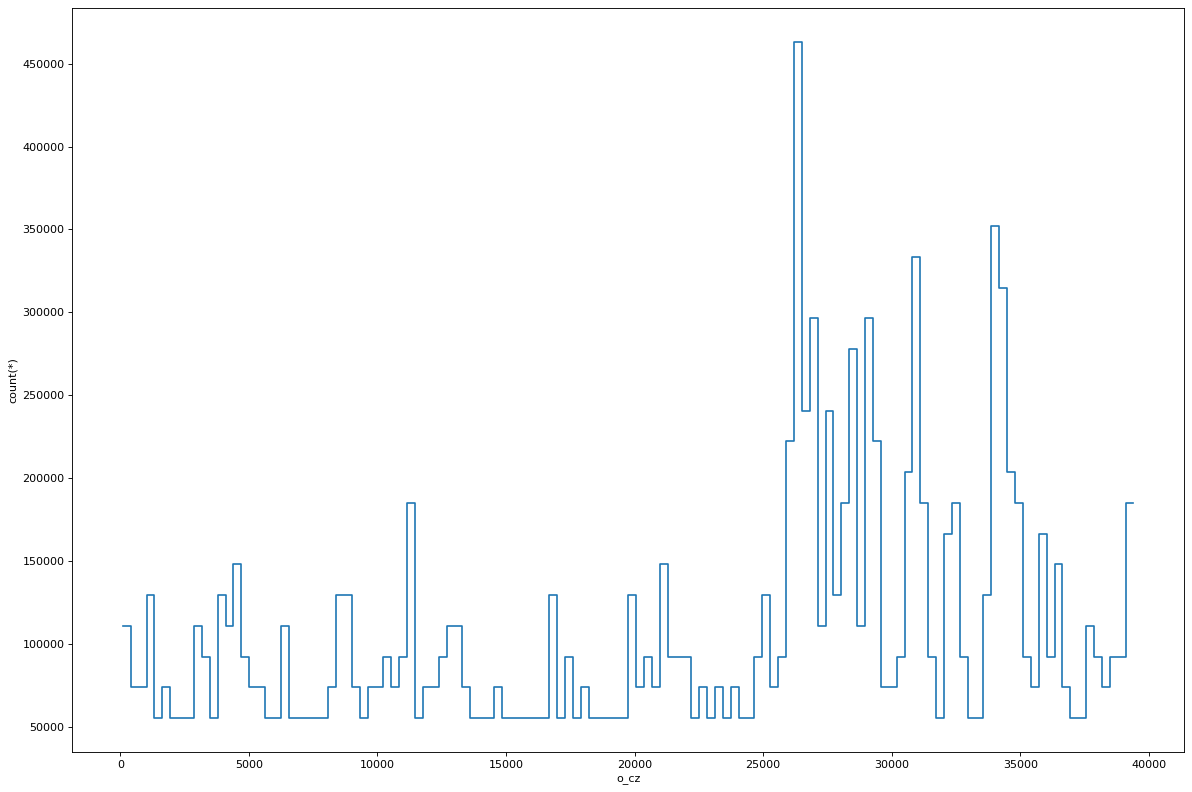

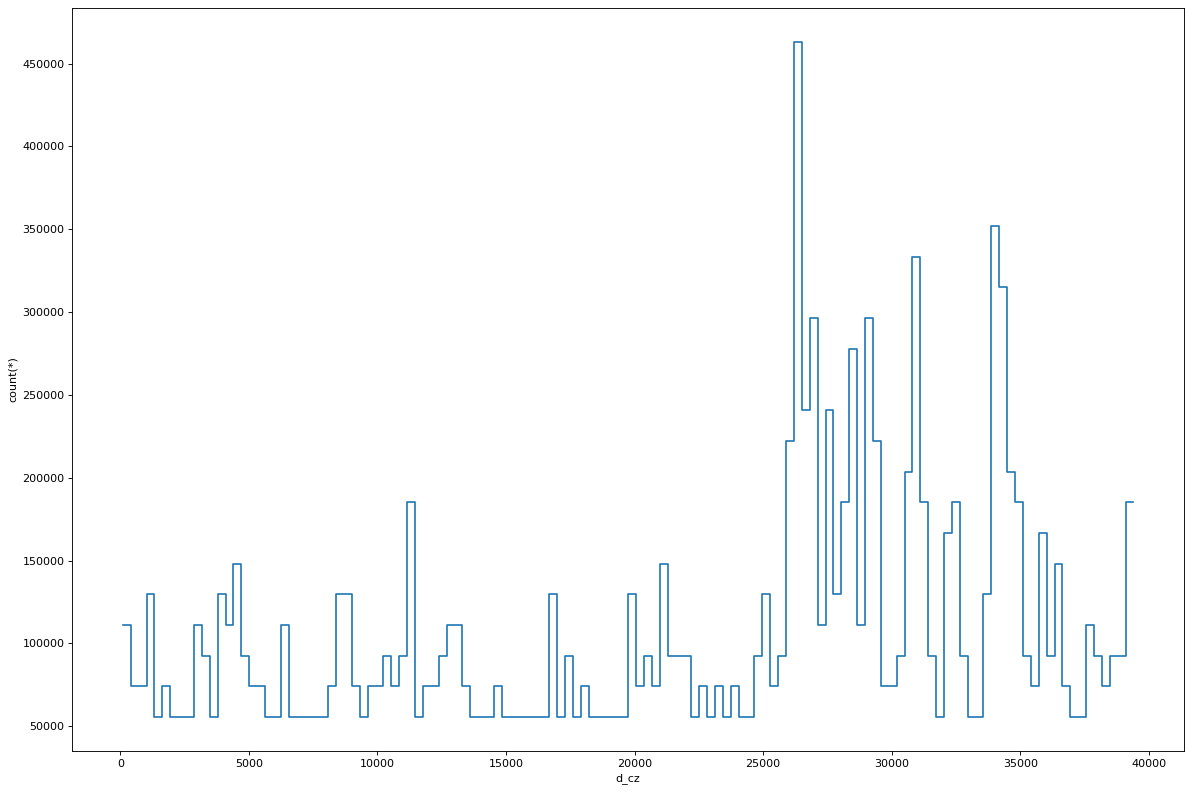

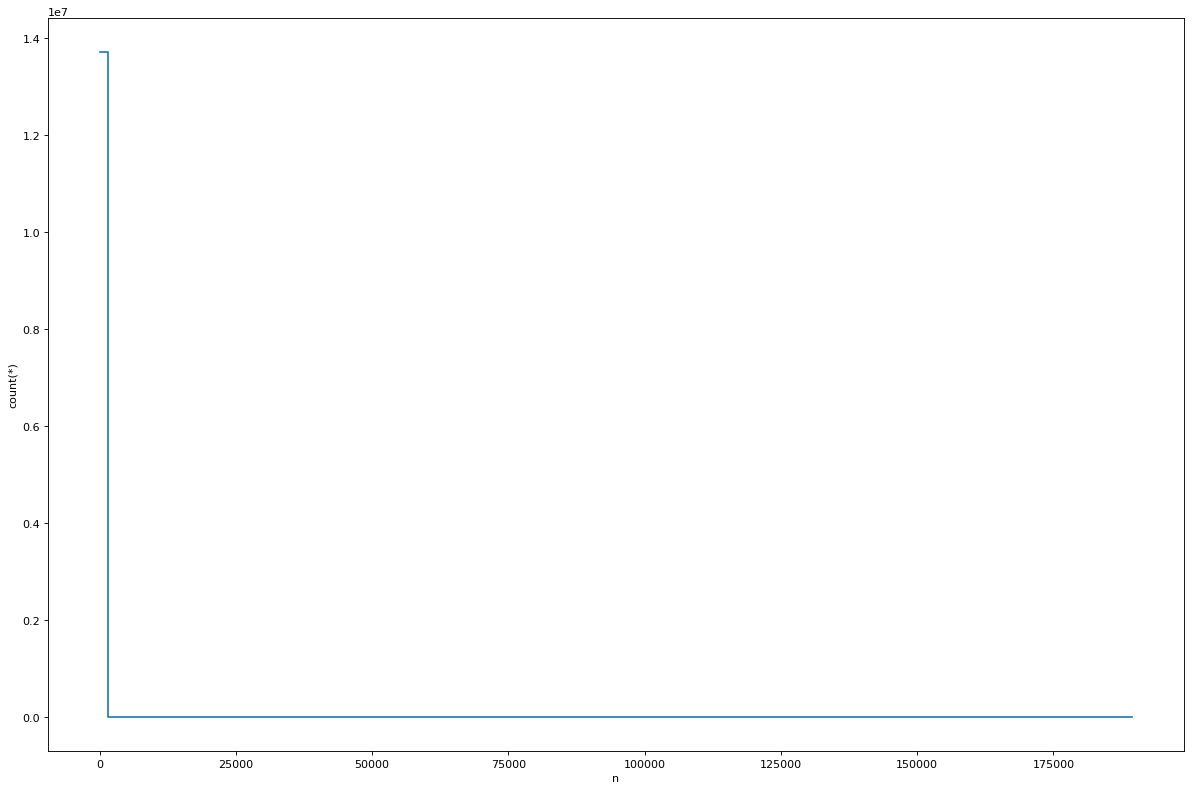

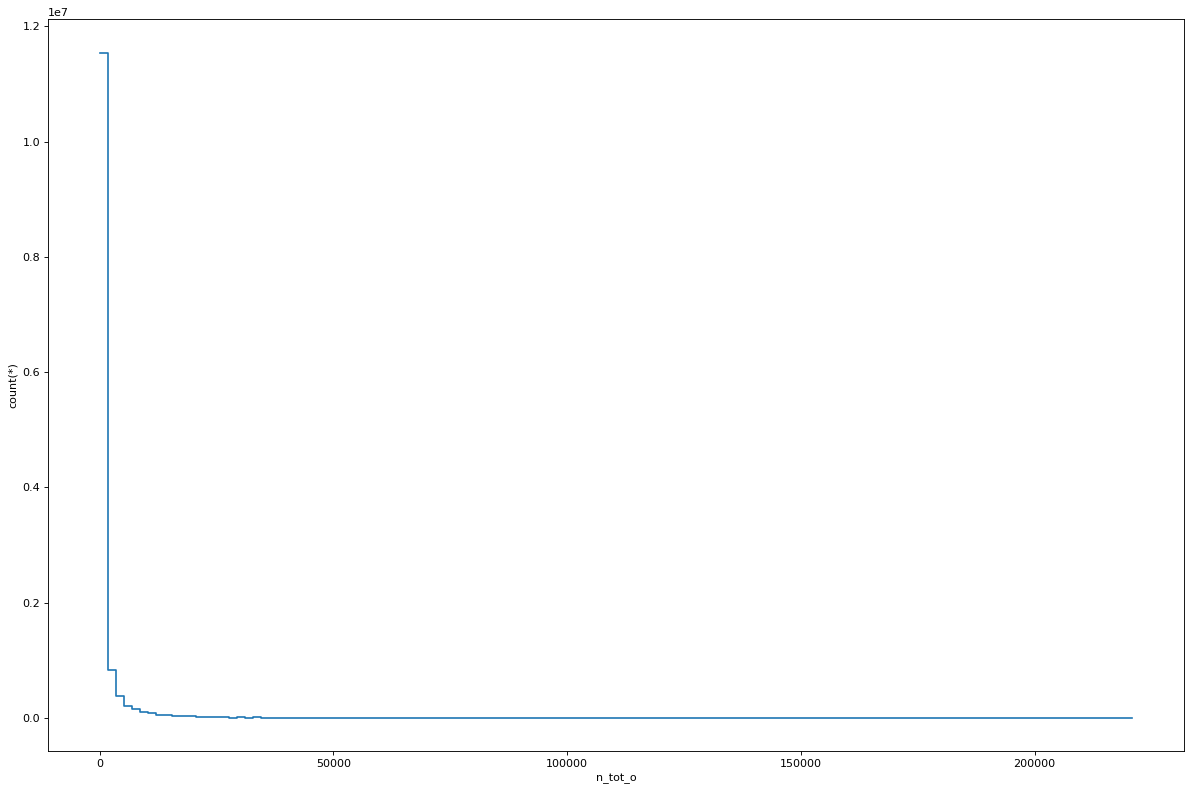

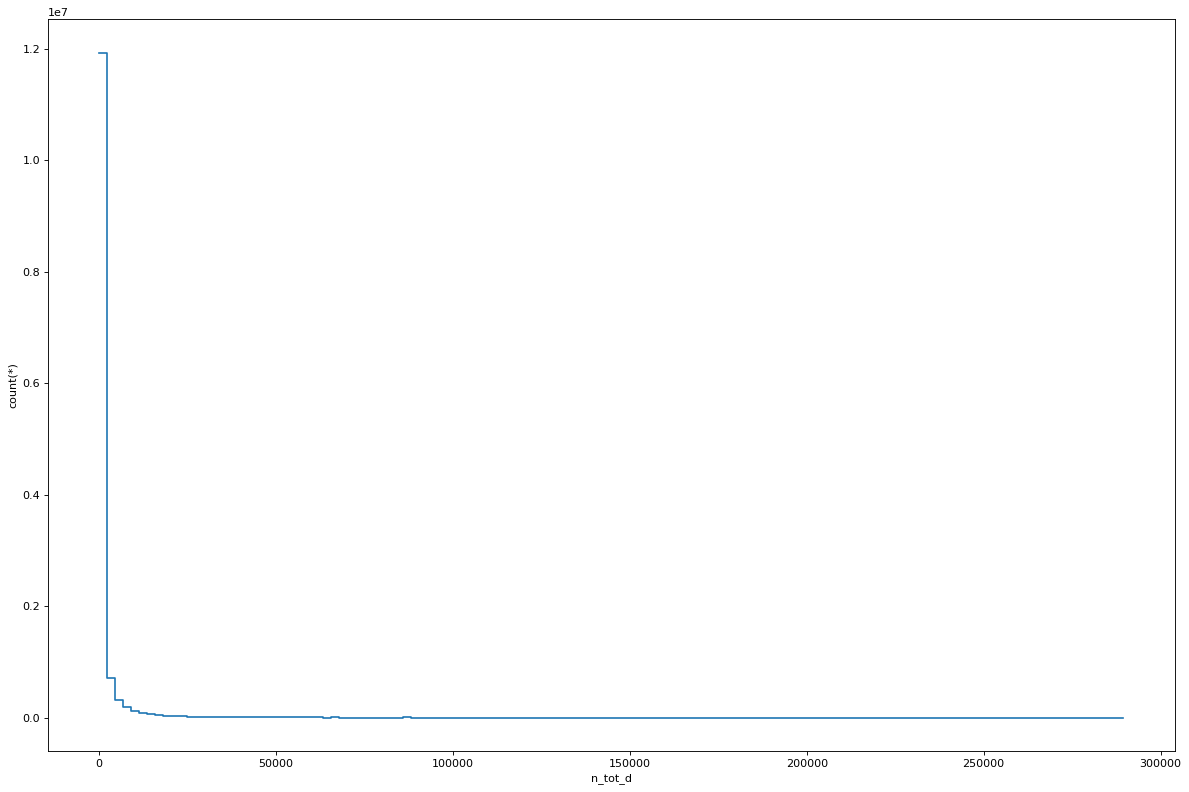

In [ ]:
start_time = time.time()
df = vaex.open('/content/od.csv')

df.o_cz.viz.histogram(shape=128, figsize=(15, 10));
df.d_cz.viz.histogram(shape=128, figsize=(15, 10));
df.n.viz.histogram(shape=128, figsize=(15, 10));
df.n_tot_o.viz.histogram(shape=128, figsize=(15, 10));
df.n_tot_d.viz.histogram(shape=128, figsize=(15, 10));

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: 1696.87
CPU times: user 10.1 s, sys: 649 ms, total: 10.7 s
Wall time: 6.27 s


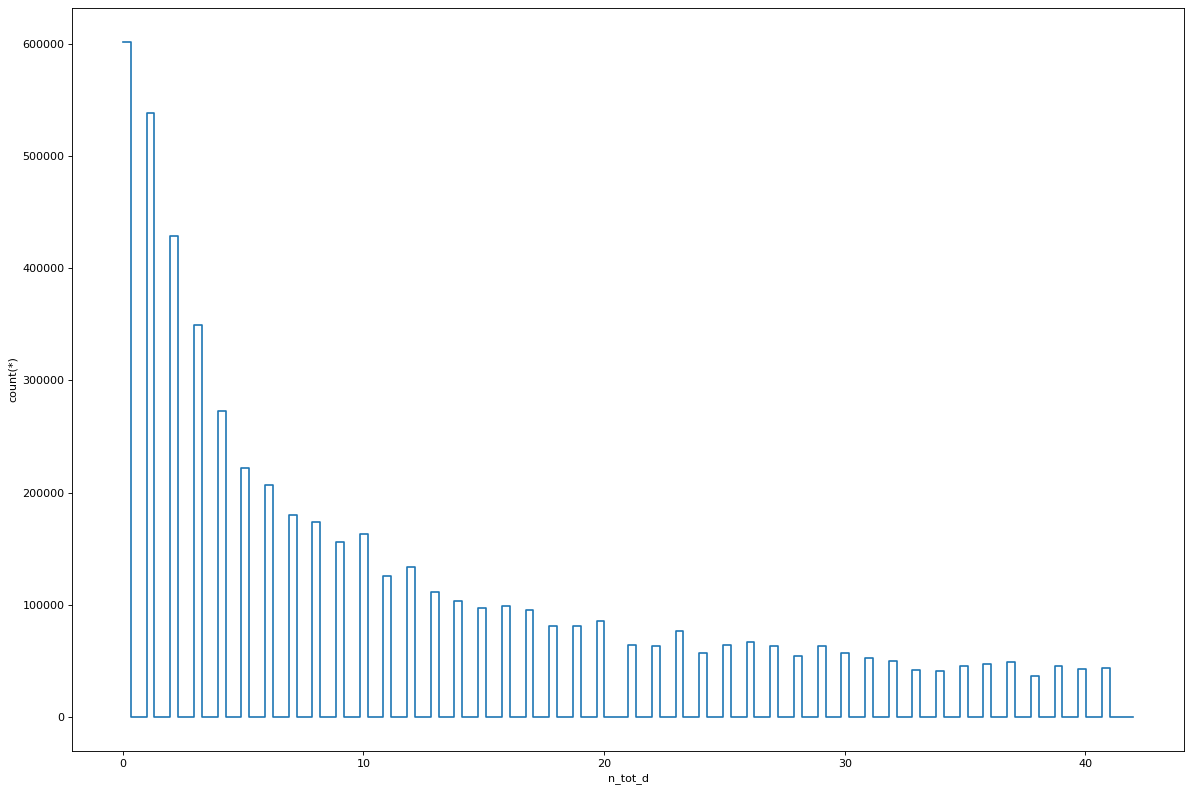

In [ ]:
# Calculate the mean of the total number of individuals who live in destination d
mean_total_destination_d = df['n_tot_d'].mean()
print(f'Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: {mean_total_destination_d:.2f}')

# Plot a histogram of the total number of individuals who live in destination d
%time df.n_tot_d.viz.histogram(shape=128, figsize=(15, 10), limits=[0, 42]);

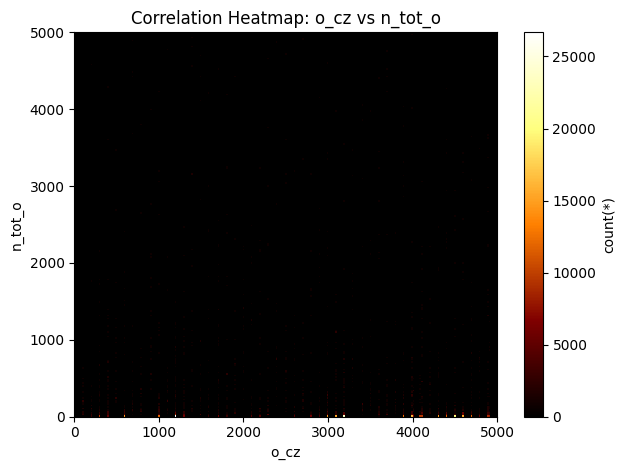

In [ ]:
# Get the correlation matrix
plt.title('Correlation Heatmap: o_cz vs n_tot_o')
df.viz.heatmap(df.o_cz, df.n_tot_o, limits = [0 ,5000])

# BUANG SAJA KALAU TAKDE

NotImplementedError: ignored

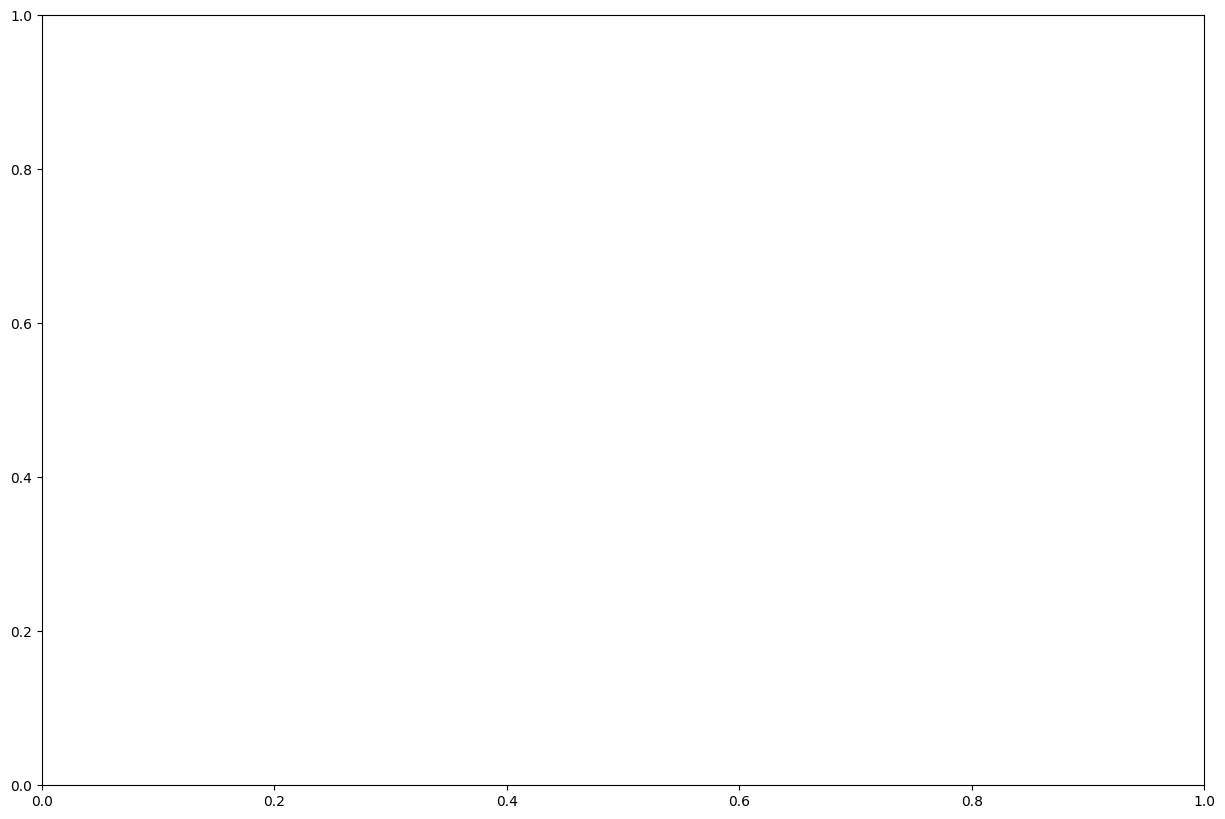

In [ ]:
# Scatter Plot of n_tot_o vs n_tot_d

plt.figure(figsize=(15, 10))
plt.scatter(df.n_tot_o, df.n_tot_d)
plt.title('Scatter Plot of n_tot_o vs n_tot_d')
plt.xlabel('n_tot_o')
plt.ylabel('n_tot_d')
plt.show()

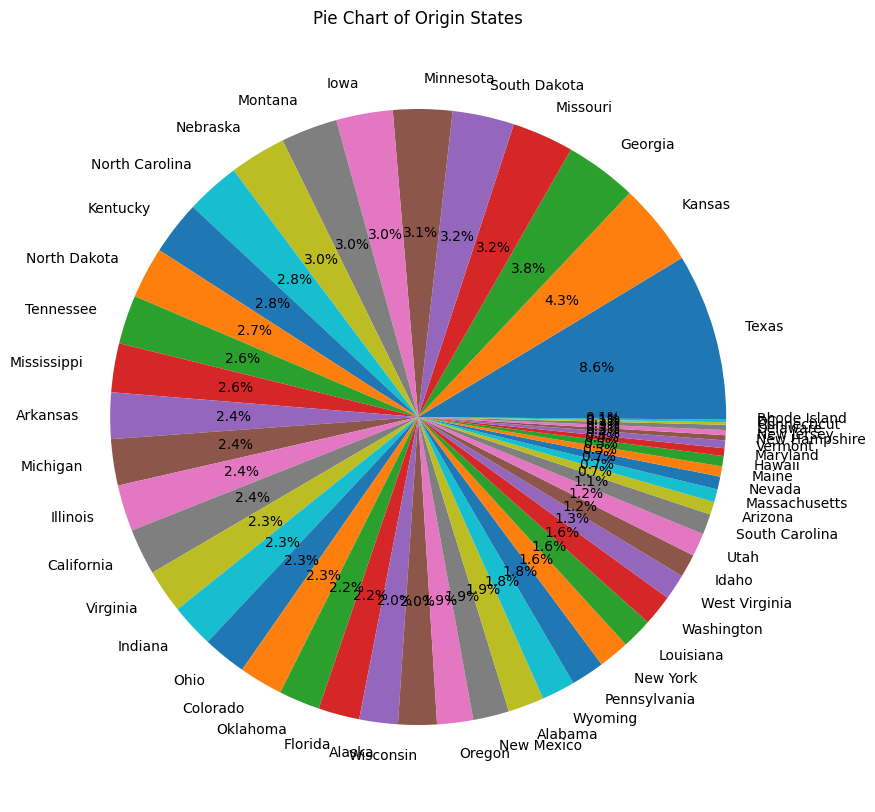

In [ ]:
# Pie Chart of o_state_name

df.o_state_name.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Pie Chart of Origin States')
plt.show()

# Features on using Vaex:

1.  Lazily open and work with huge CSV files. Vaex was able to work with files much larger than available RAM, in a very efficient way.

Check file size on disk:
1.1G	/content/od.csv

Number of rows: 13,727,025
Number of columns: 12


Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: 1696.87


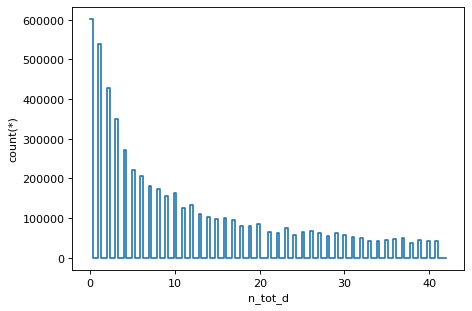

In [ ]:
print('Check file size on disk:')
!du -h /content/od.csv
print()

df = vaex.open('/content/od.csv')

print(f'Number of rows: {df.shape[0]:,}')
print(f'Number of columns: {df.shape[1]}')

#Mean of Total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz
mean_total_destination_d = df.n_tot_d.mean(progress='widget')
print(f'Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: {mean_total_destination_d:.2f}')

df.n_tot_d.viz.histogram(shape=128, figsize=(6, 4), limits=[0, 42], progress='widget');

When we use vaex.open() with a CSV file, Vaex will stream over the entire CSV file to determine the number of rows and columns, as well as the data type of each column. While this does not take any significant amount of RAM, it might take some time, depending on the number of rows and columns of the CSV.

We read through the entire **1.1 GB CSV file 3 times in under 11 seconds**, without the need to load the entire file in memory.

2. Group-by aggregations. There are two main ways to specify the aggregation operations in Vaex:

*   Option 1: Specify the column one wants to aggregate, and the alias of the aggregation operation. The resulting column will have the same name as the input column.

*   Option 2: Specify the name of the output column, and then explicitly specify the vaex aggregation

In [ ]:
df = vaex.open('/content/od.csv')

print(f'Number of rows: {df.shape[0]:,}')
print(f'Number of columns: {df.shape[1]}')


df.groupby(df.d_cz_name, progress='widget').agg(
    {'d_cz': 'mean',                              # Option 1
     'n_tot_d mean': vaex.agg.mean(df.n_tot_d),    # Option 2
    })

Number of rows: 13,727,025
Number of columns: 12


#,d_cz_name,d_cz,n_tot_d mean
0,Franklin,1201.0,148.64
1,Demopolis,10802.0,214.0
2,Fayetteville,15850.0,2767.2
3,Guymon,31006.0,86.4
4,Uvalde,32304.0,152.68
...,...,...,...
680,Sioux City,28001.0,709.68
681,Mexico,24702.0,131.64
682,Lincoln,28101.0,1626.36
683,Mobile,11001.0,2831.28


The above example is pretty standard. In fact many DataFrame libraries have a similar syntax. What is great about Vaex, is that the 2nd option allows one to create a linear combination of aggregators. For example:

In [ ]:
df.groupby(df.d_cz_name, progress='widget').agg(
    {'n_tot_d_norm': vaex.agg.mean(df.n_tot_d) / vaex.agg.std(df.n_tot_d)}
    )

#,d_cz_name,n_tot_d_norm
0,Franklin,0.5323935550388122
1,Demopolis,0.5410237491095891
2,Fayetteville,0.7972876011495073
3,Guymon,0.7600523335943407
4,Uvalde,0.5883805507479916
...,...,...
680,Sioux City,0.6031838348630757
681,Mexico,0.5197525355495309
682,Lincoln,0.5386631881138744
683,Mobile,0.7320180158424208


3. Progress bars. When doing data analysis or writing data transformation pipelines, it is common to have various steps, some more complex then others. Vaex can provide in-depth information about the progress of each individual operation in your data transformation process.




In [ ]:
with vaex.progress.tree('rich'):
    result_1 = df.groupby(df.o_cz, agg='count')
    result_2 = df.groupby(df.d_cz_name, agg=vaex.agg.sum('d_cz'))
    result_3 = df.n_tot_d.mean()

Output()